<a href="https://colab.research.google.com/github/CFathurrohman/10_Cyndu-Fathur-Rohman_PCVK_Ganjil_2024/blob/main/Week7_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 7 Tugas

Saving 3I_2341729016_3 - Fitri yanti.jpg to 3I_2341729016_3 - Fitri yanti (19).jpg


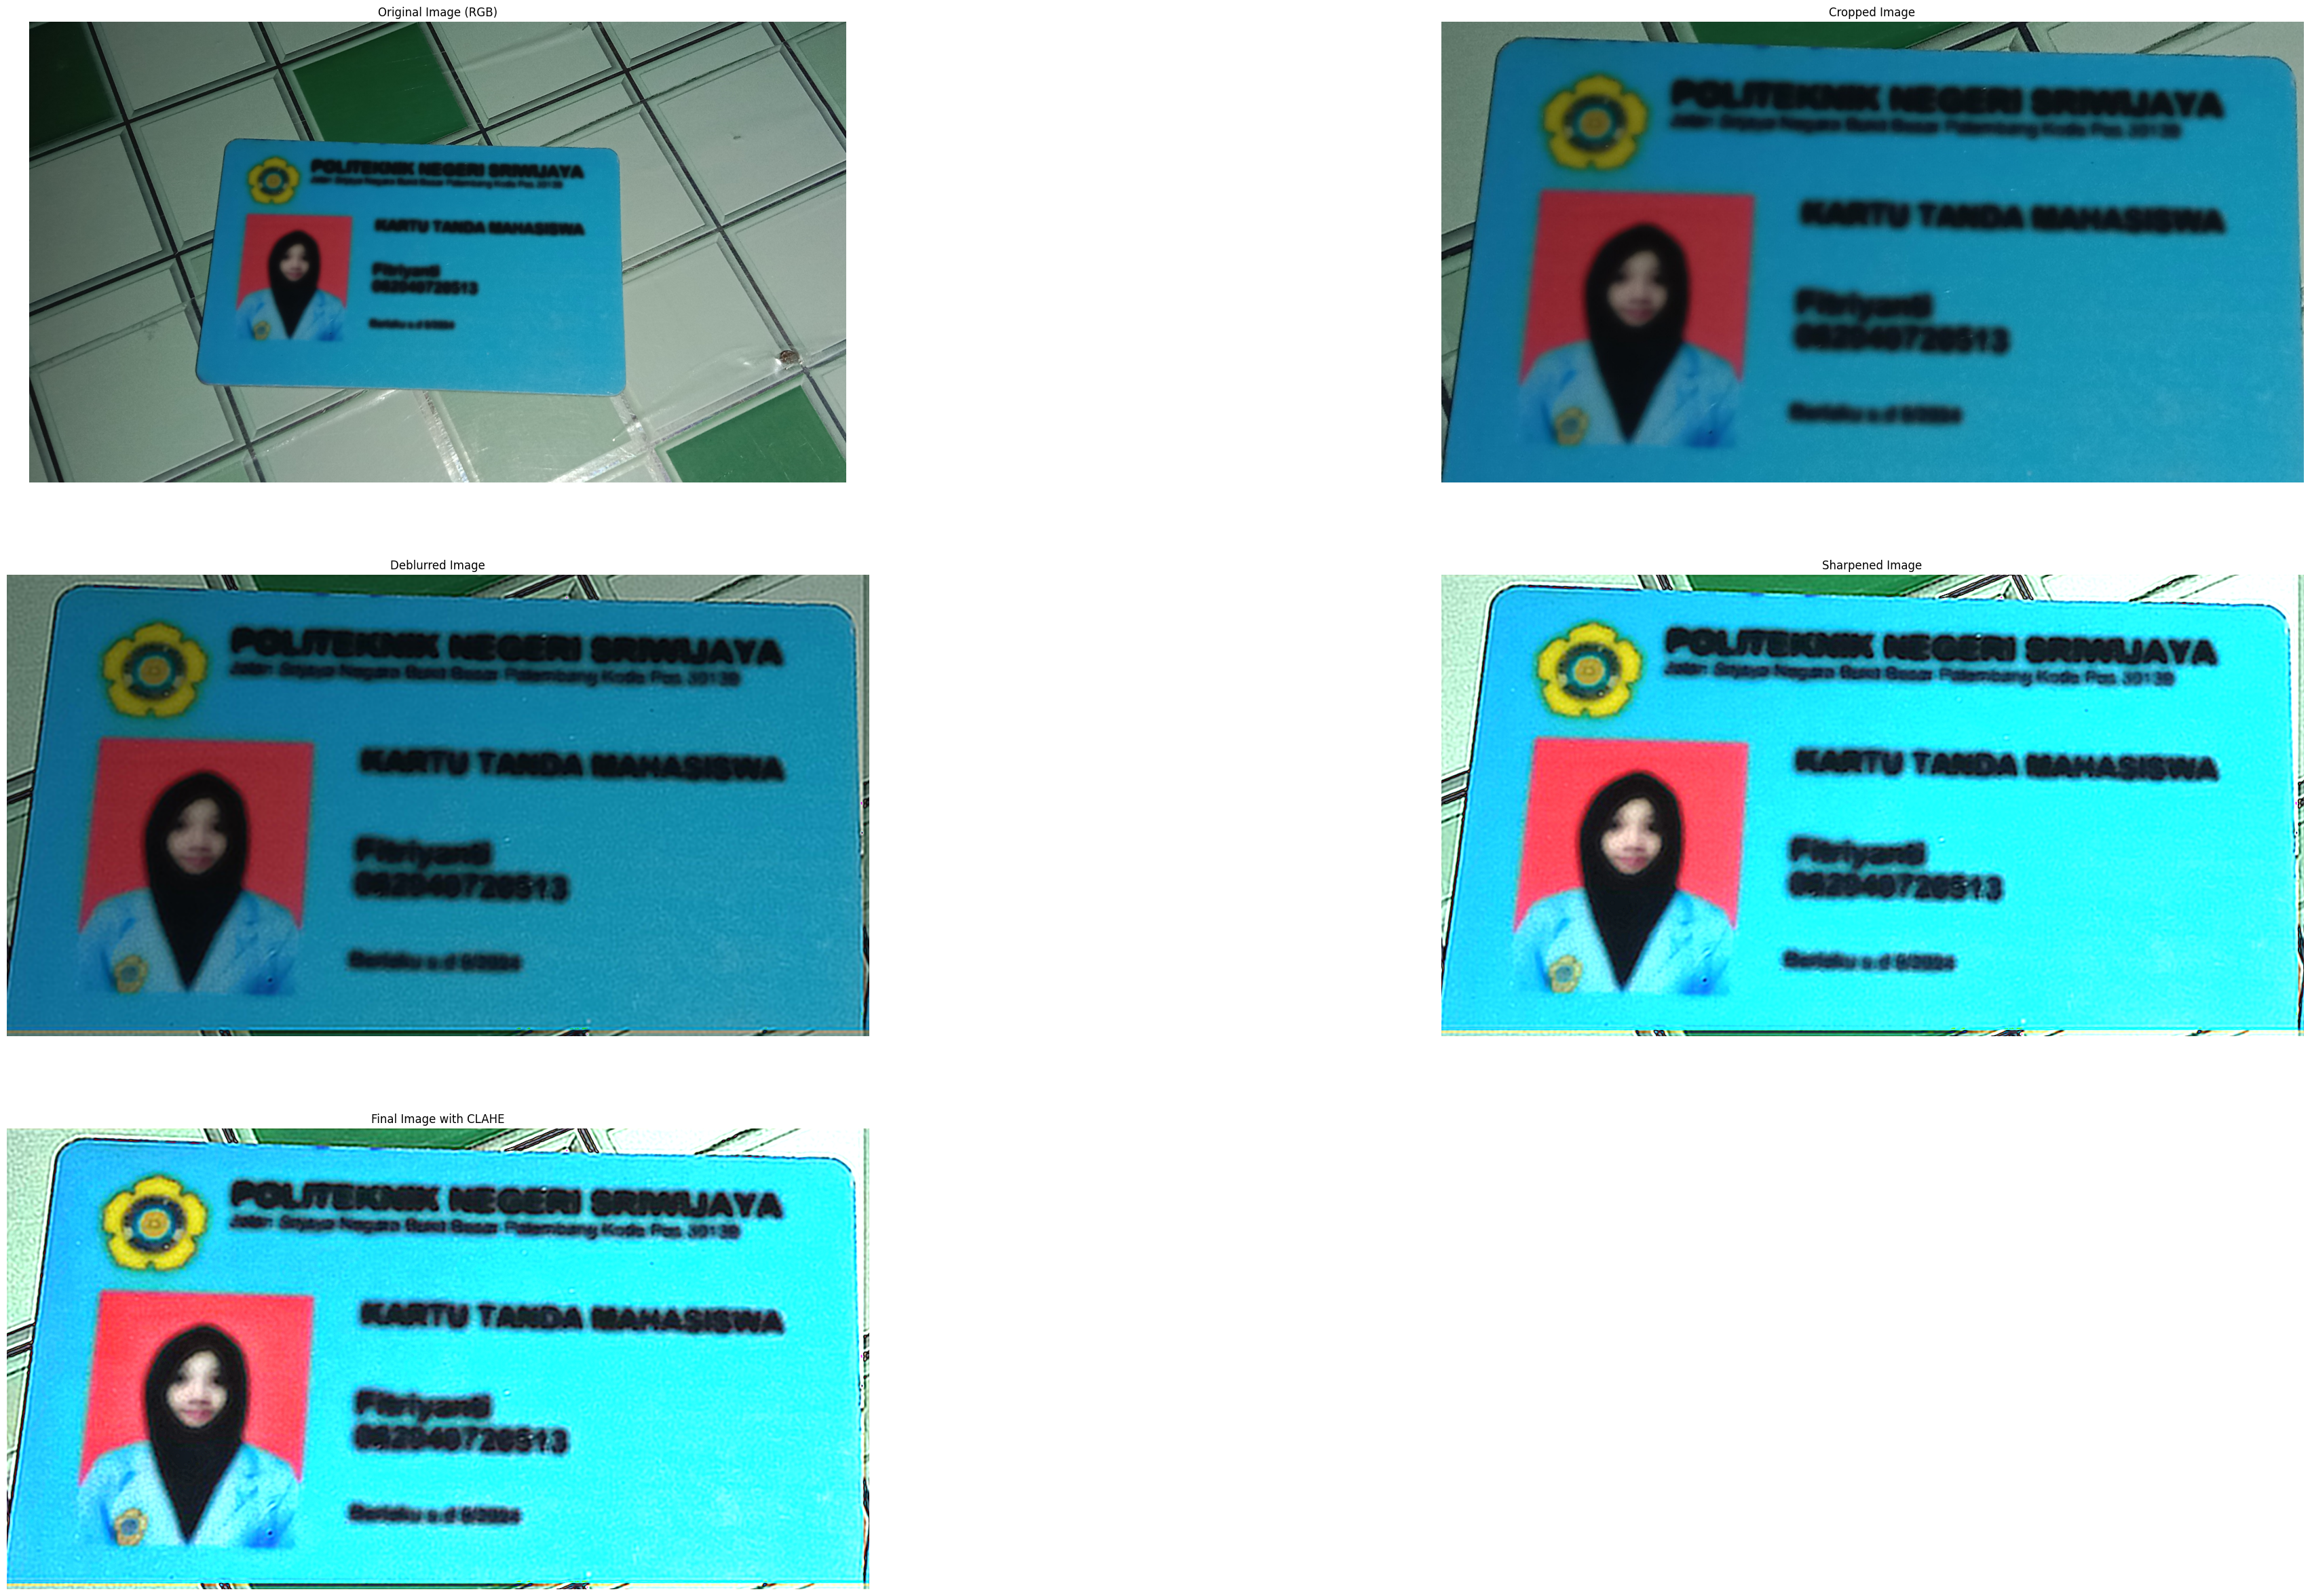

In [22]:
from google.colab import files
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Wiener filter
def wiener_filter(img, kernel, K):
    deblurred_img = np.zeros_like(img)

    # Loop untuk setiap channel
    for c in range(img.shape[2]):
        img_fft = np.fft.fft2(img[:, :, c])
        kernel_fft = np.fft.fft2(kernel, s=img.shape[:2])

        kernel_fft_conj = np.conj(kernel_fft)
        denominator = kernel_fft * kernel_fft_conj + K

        deblurred_fft = img_fft * kernel_fft_conj / denominator
        deblurred_img[:, :, c] = np.abs(np.fft.ifft2(deblurred_fft))

    return deblurred_img

# Gaussian kernel
def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

# Sharpen
def sharpen_image(image):
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    sharpened_image = cv.filter2D(image, -1, sharpening_kernel)
    return sharpened_image

# CLAHE
def apply_clahe(img):
    clahe = cv.createCLAHE(clipLimit=0.8, tileGridSize=(32, 32))
    return clahe.apply(np.uint8(img))

# Function to crop the image
def crop_image(image, x, y, width, height):
    return image[y:y+height, x:x+width]

# Function for Unsharp Masking
def unsharp_mask(image, sigma=1.5, strength=1.0):
    blurred_for_mask = cv.GaussianBlur(image, (0, 0), sigma)
    mask = cv.subtract(image, blurred_for_mask)
    sharpened_image = cv.addWeighted(image, 1.0 + strength, mask, -strength, 0)
    return sharpened_image

# Upload timage
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read image
blurred_image = cv.imread(filename)

# Convert BGR to RGB
blurred_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB)

x = 570
y = 370
width = 1440
height = 770

# Crop image
cropped_image = crop_image(blurred_image, x, y, width, height)

# Gaussian kernel parameters
kernel_size = 21
sigma = 3
gaussian_kernel = gaussian_kernel(kernel_size, sigma)

# Wiener filter
K = 0.025
deblurred_image = wiener_filter(cropped_image, gaussian_kernel, K)

# sharpening
sharpened_image = sharpen_image(deblurred_image)
final_sharpened_image = unsharp_mask(sharpened_image, sigma=1.5, strength=1.0)

# CLAHE
clahe_image = np.zeros_like(final_sharpened_image)
for i in range(3):
    clahe_image[:, :, i] = apply_clahe(final_sharpened_image[:, :, i])

# Display
plt.figure(figsize=(50, 30))

plt.subplot(3, 2, 1)
plt.title('Original Image (RGB)')
plt.imshow(blurred_image)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Cropped Image')
plt.imshow(cropped_image)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Deblurred Image')
plt.imshow(deblurred_image)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Sharpened Image')
plt.imshow(final_sharpened_image)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Final Image with CLAHE')
plt.imshow(clahe_image)
plt.axis('off')

plt.show()
